In [1]:
import tensorflow as tf
import keras
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [3]:
X_train = x_train.reshape((x_train.shape[0], 28, 28))
X_test = x_test.reshape((x_test.shape[0], 28, 28))
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

0


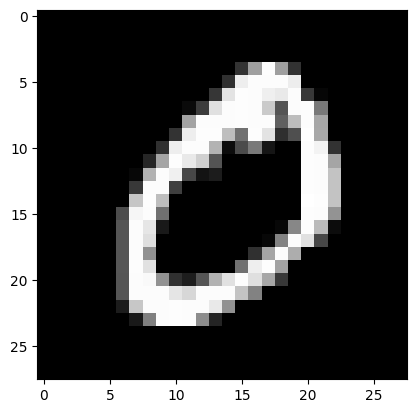

In [9]:
single_image = X_train[1, :].reshape(28,28)
plt.imshow(single_image, cmap = 'gray')
print(y_train[1])

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(X_train, Y_train, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 12s 4ms/step - loss: 1.4077 - accuracy: 0.9132 - val_loss: 0.3188 - val_accuracy: 0.9438
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1849 - accuracy: 0.9626 - val_loss: 0.1635 - val_accuracy: 0.9649
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1118 - accuracy: 0.9722 - val_loss: 0.1487 - val_accuracy: 0.9662
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0879 - accuracy: 0.9760 - val_loss: 0.1147 - val_accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0730 - accuracy: 0.9810 - val_loss: 0.1252 - val_accuracy: 0.9700


In [34]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('accuracy: ', round((test_acc * 100), 2), '%')

313/313 [==============================] - 1s 4ms/step - loss: 0.1252 - accuracy: 0.9700
accuracy:  97.0 %


313/313 [==============================] - 1s 3ms/step


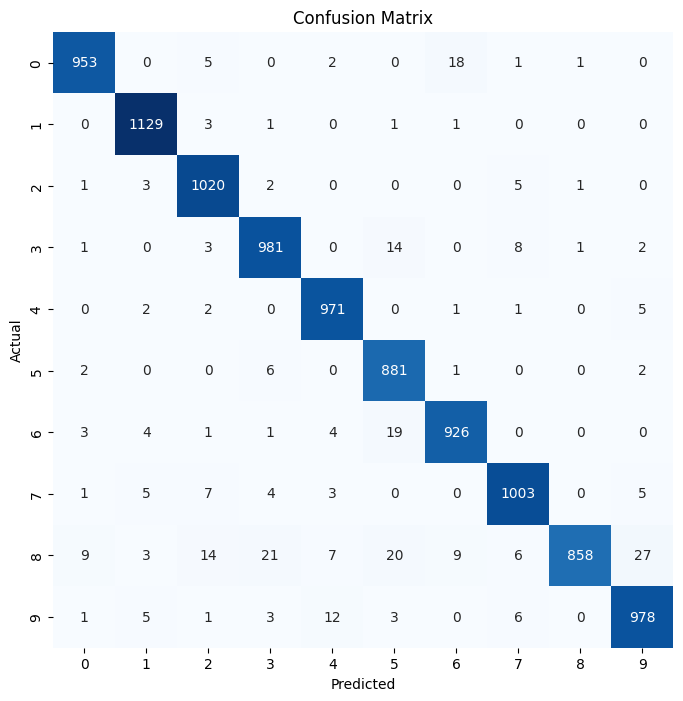

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.96      0.97      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.94      0.99      0.96       892
           6       0.97      0.97      0.97       958
           7       0.97      0.98      0.97      1028
           8       1.00      0.88      0.94       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
label_mapping = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(10) + 0.5, label_mapping.keys())
plt.yticks(np.arange(10) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [21]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(x_test))))

313/313 [==============================] - 1s 3ms/step


Test number:  7
Predicted number:  7


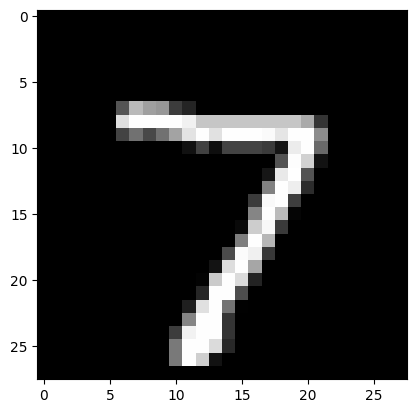

In [31]:
index = 0
single_image = X_test[index, :].reshape(28,28)
plt.imshow(single_image, cmap = 'gray')
print('Test number: ', y_test[index])
print('Predicted number: ', y_pred[index])